In [1]:
import pandas as pd
import os
from datetime import datetime

import warnings
warnings.filterwarnings('ignore')

In [2]:
current_directory = os.getcwd()
stock_df = pd.read_csv(current_directory + '/input/values-of-top-nasdaq-copanies-from-2010-to-2020/CompanyValues.csv')

In [3]:
def quick_analysis(df):
    print("Data info:")
    print(df.info())
    print("-"*40 + "\n\n" + "Rows and Columns:")
    print(df.shape)
    print("-"*40 + "\n\n" + "Null Values:")
    print(df.apply(lambda x: sum(x.isnull())))
    print("-"*40 + "\n\n" + "Describes:")
    print(df.describe())

In [4]:
quick_analysis(stock_df)
stock_df.head()

Data info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17528 entries, 0 to 17527
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ticker_symbol  17528 non-null  object 
 1   day_date       17528 non-null  object 
 2   close_value    17528 non-null  float64
 3   volume         17528 non-null  int64  
 4   open_value     17528 non-null  float64
 5   high_value     17528 non-null  float64
 6   low_value      17528 non-null  float64
dtypes: float64(4), int64(1), object(2)
memory usage: 958.7+ KB
None
----------------------------------------

Rows and Columns:
(17528, 7)
----------------------------------------

Null Values:
ticker_symbol    0
day_date         0
close_value      0
volume           0
open_value       0
high_value       0
low_value        0
dtype: int64
----------------------------------------

Describes:
        close_value        volume    open_value    high_value     low_value
count  17528.00

,ticker_symbol,day_date,close_value,volume,open_value,high_value,low_value
0,AAPL,2020-05-29,317.94,38399530,319.25,321.15,316.47
1,AAPL,2020-05-28,318.25,33449100,316.77,323.44,315.63
2,AAPL,2020-05-27,318.11,28236270,316.14,318.71,313.09
3,AAPL,2020-05-26,316.73,31380450,323.50,324.24,316.50
4,AAPL,2020-05-22,318.89,20450750,315.77,319.23,315.35


In [5]:
stock_df['date_time']  = pd.to_datetime(stock_df['day_date'])
stock_df['date'] = stock_df['date_time'].dt.date
stock_df = stock_df.sort_values(by="date")

In [6]:
stock_df['prev_close_value'] = stock_df.groupby('ticker_symbol')['close_value'].shift(1)
stock_df['prev_close_value'].fillna(0, inplace=True)

In [7]:
stock_df.head()

,ticker_symbol,day_date,close_value,volume,open_value,high_value,low_value,date_time,date,prev_close_value
5601,AMZN,2010-06-01,123.2400,3650661,124.9700,126.5720,123.0200,2010-06-01,2010-06-01,0.0000
2516,AAPL,2010-06-01,37.2614,218455576,37.0986,37.9914,36.9943,2010-06-01,2010-06-01,0.0000
8686,GOOGL,2010-06-01,243.6667,2664303,242.6868,248.0565,242.5302,2010-06-01,2010-06-01,0.0000
13894,MSFT,2010-06-01,25.8900,76120800,25.5300,26.3100,25.5200,2010-06-01,2010-06-01,0.0000
8685,GOOGL,2010-06-02,249.2233,2513109,245.8439,249.4759,243.2071,2010-06-02,2010-06-02,243.6667


<AxesSubplot:xlabel='date_time'>

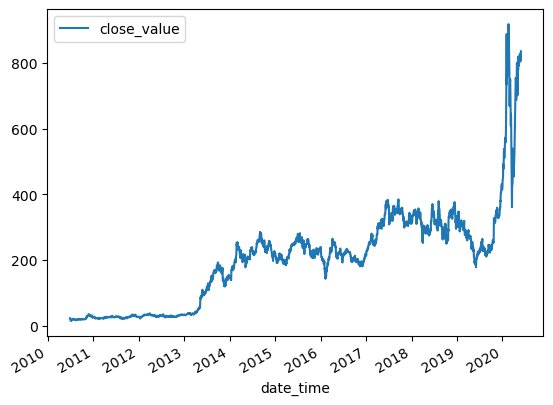

In [8]:
stock_df[stock_df['ticker_symbol'] == 'TSLA'].plot(x='date_time', y='close_value')

In [9]:
start_date = datetime(2015, 1, 1)
end_date = datetime(2019, 12, 31)

stock_df = stock_df[(stock_df['date_time'] >= start_date) & (stock_df['date_time'] <= end_date)]

<AxesSubplot:xlabel='date_time'>

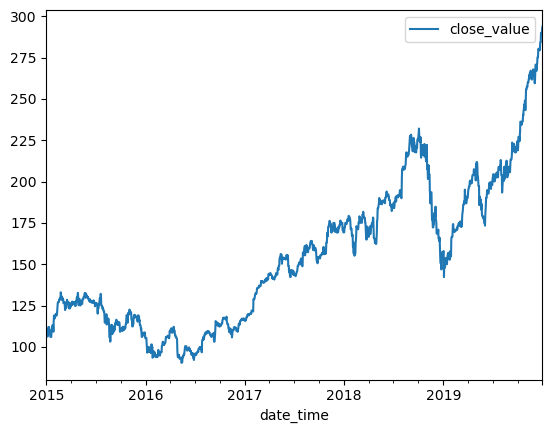

In [10]:
stock_df[stock_df['ticker_symbol'] == 'AAPL'].plot(x='date_time', y='close_value')

In [11]:
processed_file_path = current_directory + '/input/processed_data/stocks.csv'
stock_df.to_csv(processed_file_path, index=False)